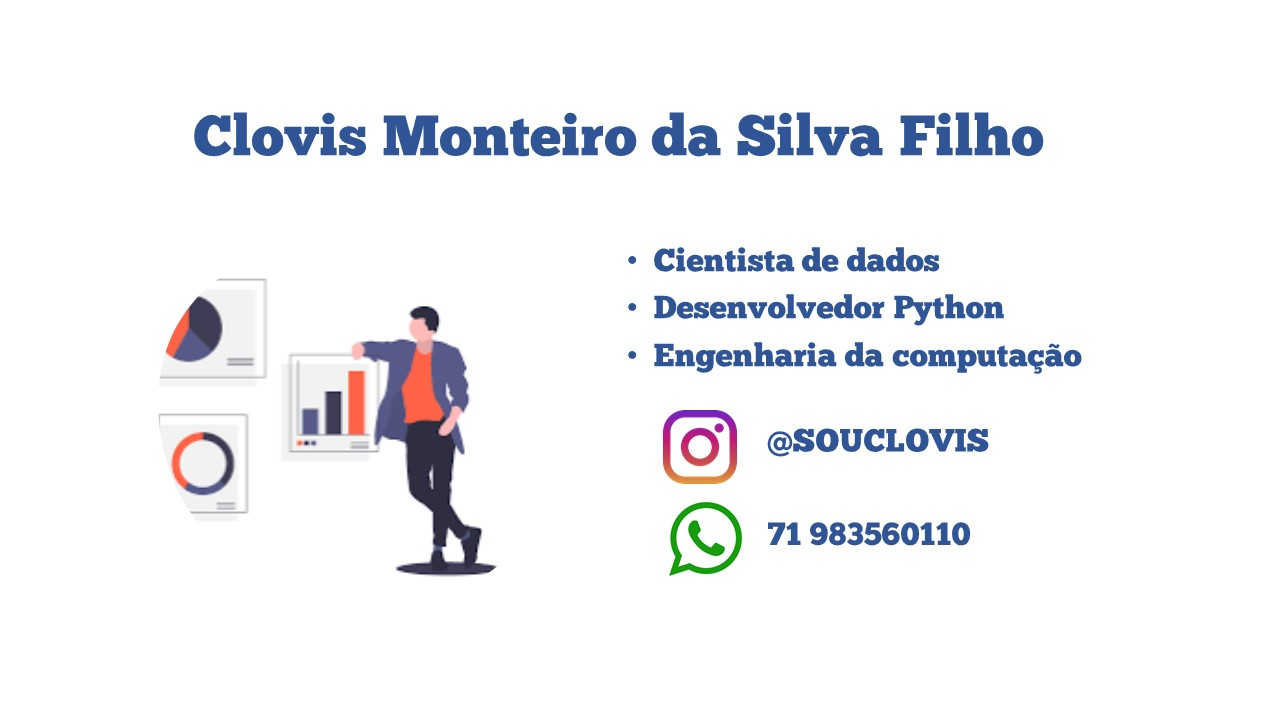

# CIDACS: SUPORTE EM ROTINAS DE PRODUÇÃO DE DADOS - Data analysis

### Projeto prático para demonstrar conhecimentos na área de Ciência de Dados utilizando a linguagem de programação Python

##### Por Clovis Monteiro da Silva Filho

### Neste projeto, estou implementando algumas soluções propostas pela equipe da CIDACS para avaliar meu conhecimento técnico em análise e manipulação de dados em geral. 

### Tópicos : 
- 1.0 - Importando bibliotecas e configurando ambiente
- 2.0 - Dicionário dos dados
- 3.0 - Desafio
    - 3.1 - Crie uma variável com o código UF (Unidade Federativa) onde as UBS estão localizadas: 
        - 3.1.1 - Quais são os códigos UF presentes no banco de dados?
        - 3.1.2 - Quais são os códigos UF mais frequentes (os 5 mais frequentes) e com que frequência ocorrem?
        - 3.1.3 - Quantas cidades existem nessas 5 UFs mais frequentes?
    - 3.2 - Existe uma variável de data fictícia (data_eq) no banco de dados criado apenas para este processo de seleção. Crie uma variável com o ano extraído dessa variável:
        - 3.2.1 - Mostra a distribuição dos registros por ano;
    - 3.3 - Crie uma variável com o comprimento do campo do telefone:
        - 3.3.1 - Quais são os comprimentos menos frequentes (os 5 menos frequentes) dos números de telefone?
        - 3.3.2 - Quantos registros têm um comprimento de telefone diferente de 10? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?
    - 3.4 - Pergunta bônus: Há informações na variável de telefone que não correspondem a um número de telefone? Em caso afirmativo, remova essas informações.
    - 3.5 - Quantos registros alcançaram um desempenho acima ou muito acima da média em relação ao status dos medicamentos? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?
    - 3.6 - Quantos registros na Bahia (código 29) obtiveram desempenho médio em relação à situação dos medicamentos e desempenho acima ou muito acima da média em relação à situação dos equipamentos? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?
    - 3.7 - Quantos registros tiveram o pior desempenho em todas as variáveis ​​que medem as situações de desempenho? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?

    


# 1.0 - Importando bibliotecas e configurando ambiente

In [1]:
# importando bibliotecas necessárias para utilizar métodos já existentes e auxilizar nas análises
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
import warnings

warnings.filterwarnings('ignore')

# 2.0 - Dicionário dos dados

- Data dictionary
    - cod_munic: IBGE code, lenght: 7 characters.
    - dsc_bairro: Name of neighborhood.
    - dsc_cidade: Name of city.
    - cod_cnes: CNES code
    - nom_estab: Name of the establishment
    - dsc_endereco: Address of UBS
    - dsc_estrut_fisic_ambiencia: Situation-related to general structure
    - dsc_adap_defic_fisic_idosos: Situation-related to adaptations for the disabled and the elderly
    - dsc_equipamentos: Situation-related to equipament
    - dsc_medicamentos: Situation-related to medicine
    - data_eq: Date variable

# 3.0 Desafio

O desafio consiste em demonstrar conhecimentos pertinentes a data science no quesito domínio da linguagem e aplicação em casos reais. 

Os dados foram manipulados a partir de uma tabela disponibilizada de forma pública e diz respeito às Unidades Básicas de Saúde 
(UBS). Esses postos oferecem serviços gratuitos de atenção básica à saúde como consultas, curativos, aplicações de vacinas,  tratamentos odontológicos e outros.

# Importando dataset baixado do github

In [3]:
# Método para verificar os arquivos dentro das pastas e auxiliar a pegar os nomes sem erros
os.listdir('./dados')

['img_art_2.jpg', 'ubs.csv', 'UF.xlsx']

In [4]:
# Abrindo arquivo no formato csv
url = './dados/ubs.csv'
ubs = pd.read_csv(url, sep=',', encoding='utf-8')

In [5]:
# Mostrando algumas linhas
ubs.head(4)

,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq
0,-10.911237,-37.062078,280030,3492,US OSWALDO DE SOUZA,TV ADALTO BOTELHO,GETULIO VARGAS,Aracaju,7931791326,Desempenho acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2017-06-15
1,-9.485943,-35.857573,270770,6685315,USF ENFERMEIRO PEDRO JACINTO AREA 09,R 15 DE AGOSTO,CENTRO,Rio Largo,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-07-18
2,-23.896000,-53.410000,411885,6811299,UNIDADE DE ATENCAO PRIMARIA SAUDE DA FAMILIA,RUA GUILHERME BRUXEL,CENTRO,Perobal,4436251462,Desempenho muito acima da média,Desempenho muito acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média,2017-09-11
3,-16.447874,-41.009860,313580,6335616,POSTO DE SAUDE DE BOM JESUS DA ALDEIA,RUA TEOFILO OTONI,ALDEIA,Jequitinhonha,3337411423,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-28


In [6]:
# Método para analisar os tipos de dados no dataset
ubs.dtypes.to_frame()

,0
vlr_latitude,float64
vlr_longitude,float64
cod_munic,int64
cod_cnes,int64
nom_estab,object
dsc_endereco,object
dsc_bairro,object
dsc_cidade,object
dsc_telefone,object
dsc_estrut_fisic_ambiencia,object


In [7]:
# Variável auxiliar com a informação da quantidades de linhas totais do arquivo
base_completa = ubs.shape[0]

### 3.1 - Crie uma variável com o código UF (Unidade Federativa) onde as UBS estão localizadas. 


In [9]:
# Arquivo auxiliar com as informações dos códigos de UF e Siglas 
municipios = pd.read_excel('./dados/UF.xlsx')

municipios = municipios[['cod_uf', 'Sigla']]
municipios['cod_uf'] = municipios['cod_uf'].astype(str).str[0:2]
cod_uf = ubs['cod_munic'].astype(str).str[0:2]
ubs['cod_uf'] = cod_uf

In [10]:
# merge (união) dos dados para obter a iformação da UF
ubs = pd.merge(municipios, ubs, on='cod_uf', how='outer', indicator=True)

In [11]:
# Mostrando que todos os dados foram unidos
ubs['_merge'].value_counts()

both          37690
right_only        0
left_only         0
Name: _merge, dtype: int64

In [12]:
#Excluindo a coluna que não será utilizada
ubs.drop(columns=['_merge'], inplace=True)

In [611]:
# R: A variável é *cod_uf*
ubs

,cod_uf,Sigla,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq
0,11,RO,-10.710629,-62.259285,110015,2496909,CENTRO DE SAUDE CARLOS CHAGAS,R D PEDRO II,CENTRO,Ouro Preto do Oeste,6934613310,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-01
1,11,RO,-12.356765,-60.925927,110092,2743671,PS CORGAO CHUPINGUAIA,LINHA 95,ZONA RURAL,Chupinguaia,Não se aplica,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-01-14
2,11,RO,-8.850592,-63.940902,110020,6021999,UNIDADE DE SAUDE DA FAMILIA VILA PRINCESA,BR 364 VILA PRINCESA,VILA PRINCESA,Porto Velho,Não se aplica,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho acima da média,2016-08-04
3,11,RO,-11.825237,-62.923121,110150,2744325,PSF BOM SUCESSO,LINHA 12 KM 9,ZONA RURAL,Seringueiras,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2016-10-02
4,11,RO,-9.427879,-62.007458,110013,3868893,UNID CENTRAL DE VIG EPIDEM E ENDEMIAS MACHADIN...,RUA TOCANTINS,CENTRO,Machadinho D'Oeste,6935813286,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-02-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37685,27,AL,-9.911492,-36.346099,270915,2008556,UNIDADE DO PACS DE TEOTONIO VILELA,CONJUNTO JUAREZ ORESTES GOMES DE BARROS,CENTRO,Teotônio Vilela,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2016-06-28
37686,27,AL,-9.167243,-36.225100,270810,2719541,CENTRO DE SAUDE DE SANTANA DO MUNDAU,RUA SILVESTRE PERICLES,CENTRO,Santana do Mundaú,82 3289 -1213,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-07-02
37687,27,AL,-10.011624,-36.023655,270375,2721600,USF SINHA CAVALCANTE I,TRAVESSA BOA VISTA,CENTRO,Jequiá da Praia,32765169,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho muito acima da média,2018-02-23
37688,27,AL,-9.413073,-36.797633,270255,2011468,UNIDADE DE SAUDE DA FAMILIA DR ALVARO MACHADO,SERRA DO BERNADINO,ZONA RURAL,Estrela de Alagoas,Não se aplica,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,2017-02-18


### 3.1.1 - Quais são os códigos UF presentes no banco de dados?

In [13]:
# Organizando as informações
uf_presentes = ubs['cod_uf'].drop_duplicates()
uf_presentes = pd.DataFrame(uf_presentes)
uf_presentes.reset_index(inplace=True)
uf_presentes.drop(columns=['index'], inplace=True)

In [16]:
# Essas são os códigos das UF's presentes
uf_presentes.sort_values('cod_uf')

,cod_uf
0,11
1,12
16,13
17,14
18,15
2,16
19,17
20,21
21,22
22,23


### 3.1.2 - Quais são os códigos UF mais frequentes (os 5 mais frequentes) e com que frequência ocorrem?

In [17]:
# Criando novo dataset para não alterar o atual
ubs_new = ubs[['cod_uf', 'Sigla']]

In [19]:
#Método para contar os valores das UF's iguais
ufs_frequentes = ubs_new['Sigla'].value_counts()

In [20]:
ufs_frequentes= pd.DataFrame(ufs_frequentes).reset_index()
ufs_frequentes5 = ufs_frequentes.head(5)

In [21]:
ufs_frequentes5.columns=['Sigla', 'Quantidades de vezes que aparece']

In [23]:
#Códigos mais frequentes
ufs_frequentes5['Sigla']

0    MG
1    SP
2    BA
3    PR
4    RS
Name: Sigla, dtype: object

In [24]:
#Códigos mais frequentes com a quantidade
ufs_frequentes5

,Sigla,Quantidades de vezes que aparece
0,MG,4859
1,SP,4169
2,BA,3571
3,PR,2408
4,RS,2225


### 3.1.3 - Quantas cidades existem nessas 5 UFs mais frequentes?

In [25]:
# Coletando as informações das cidades apenas para as 5 cidades mais frequentes
cidades_uf = pd.merge(ufs_frequentes5, ubs, on='Sigla', how='outer', indicator=True)

In [26]:
cidades_uf = cidades_uf.query('"both" in _merge').copy()

In [27]:
qtd_cidades = cidades_uf['dsc_cidade'].drop_duplicates()
qtd_cidades = pd.DataFrame(qtd_cidades)

In [28]:
print('Resultado: Existem ' + str(qtd_cidades.shape[0]) +' cidades nas 5 UFs mais frequentes')

Resultado: Existem 2754 cidades nas 5 UFs mais frequentes


### 3.2 - Existe uma variável de data fictícia (data_eq) no banco de dados criado apenas para este processo de seleção. Crie uma variável com o ano extraído dessa variável.


In [29]:
# Selecionando apenas os caracteres do ano da coluna "data_eq"
data_eq_ano = ubs['data_eq'].astype(str).str[0:4]

In [30]:
ubs['data_eq_ano'] = data_eq_ano

In [31]:
ubs.head(3)

,cod_uf,Sigla,vlr_latitude,vlr_longitude,cod_munic,cod_cnes,nom_estab,dsc_endereco,dsc_bairro,dsc_cidade,dsc_telefone,dsc_estrut_fisic_ambiencia,dsc_adap_defic_fisic_idosos,dsc_equipamentos,dsc_medicamentos,data_eq,data_eq_ano
0,11,RO,-10.710629,-62.259285,110015,2496909,CENTRO DE SAUDE CARLOS CHAGAS,R D PEDRO II,CENTRO,Ouro Preto do Oeste,6934613310,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2017-02-01,2017
1,11,RO,-12.356765,-60.925927,110092,2743671,PS CORGAO CHUPINGUAIA,LINHA 95,ZONA RURAL,Chupinguaia,Não se aplica,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,Desempenho mediano ou um pouco abaixo da média,2016-01-14,2016
2,11,RO,-8.850592,-63.940902,110020,6021999,UNIDADE DE SAUDE DA FAMILIA VILA PRINCESA,BR 364 VILA PRINCESA,VILA PRINCESA,Porto Velho,Não se aplica,Desempenho acima da média,Desempenho mediano ou um pouco abaixo da média,Desempenho acima da média,Desempenho acima da média,2016-08-04,2016


### 3.2.1 - Mostre a distribuição dos registros por ano.

In [36]:
# organizando métodos para responder sobre as distribuições
distrubuicao_ano = ubs['data_eq_ano'].value_counts()
distrubuicao_ano = pd.DataFrame(distrubuicao_ano)
distrubuicao_ano.reset_index(inplace=True)

In [37]:
distrubuicao_ano.columns=['Ano', 'Quantidade']

In [38]:
distrubuicao_ano.sort_values(by='Ano', inplace=True)

In [41]:
# Gráfico para mostrar a distribuição que é pedida
# Caso o gráfico não carregue, por favor execute no anaconta navigator - "conda install plotly" - obs: precisa permissão de adm
fig = go.Figure()

fig.add_trace(go.Scatter(
    y=distrubuicao_ano['Quantidade'], 
    x = distrubuicao_ano['Ano'] ,  
    mode='lines+markers',   
    name='Ano'))

fig.update_layout(
    title= "Distribuição de registros por ano",
    yaxis_title="Quantidade de registros")


fig.show()

### 3.3 - Crie uma variável com o comprimento do campo do telefone

In [42]:
# Utilizando método de strings para obter a quantidade de caracteres de cada linha
comprimento_tel = ubs['dsc_telefone'].str.len()
ubs['comprimento_telefone'] = comprimento_tel

In [43]:
ubs['comprimento_telefone']

0        10
1        13
2        13
3        13
4        10
         ..
37685    13
37686    13
37687     8
37688    13
37689    12
Name: comprimento_telefone, Length: 37690, dtype: int64

### 3.3.1 - Quais são os comprimentos menos frequentes (os 5 menos frequentes) dos números de telefone?

In [45]:
comprimento_t = ubs['comprimento_telefone'].value_counts().to_frame().reset_index()

In [46]:
comprimento_t.columns=['Comprimento_tel', 'Qtd. vezes']

In [47]:
# Mostrando os ultimos 5 comprimentos menos frequentes
comprimento_t[-5:]

,Comprimento_tel,Qtd. vezes
13,19,5
14,22,2
15,25,1
16,24,1
17,26,1


### 3.3.2- Quantos registros têm um comprimento de telefone diferente de 10? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?

In [48]:
# Pegando os Valores que são diferentes de 10
comp_s_10 = comprimento_t[comprimento_t['Comprimento_tel']!=10].sum()['Qtd. vezes']

In [49]:
print('Resposta: Existem '+str(comp_s_10) + ' registros com o comprimento do telefone diferente de 10')

Resposta: Existem 19546 registros com o comprimento do telefone diferente de 10


In [50]:
# porcentagem
porc = comp_s_10 / comprimento_t['Qtd. vezes'].sum() * 100

print('Resposta: A porcentagem em relação ao banco de dados é: {:.2f}'.format(porc)+'%.')

Resposta: A porcentagem em relação ao banco de dados é: 51.86%.


### 3.4 - Pergunta bônus: Há informações na variável de telefone que não correspondem a um número de telefone? Em caso afirmativo, remova essas informações.

In [53]:
# Dataframe antes de remover as informações
ubs.shape

(37690, 18)

In [54]:
ubs['dsc_telefone'].value_counts()

Não se aplica    7891
(83) 30499500      38
(91)37512003       28
(96)2131109        27
(33)32712088       23
                 ... 
9882242170          1
5139831050          1
5433291450          1
4734180407          1
7536382868          1
Name: dsc_telefone, Length: 25185, dtype: int64

In [55]:
ubs.query('"Não se aplica" not in dsc_telefone', inplace=True)

In [56]:
#Dataframe depois de remover as informações
ubs.shape

(29799, 18)

### 3.5 - Quantos registros alcançaram um desempenho acima ou muito acima da média em relação ao status dos medicamentos? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?

In [57]:
qtd_reg = ubs['dsc_medicamentos'].value_counts()[1:3]
qtd_reg = pd.DataFrame(qtd_reg)
qtd_reg.reset_index(inplace=True)

In [64]:
qtd_reg.columns=['dsc_medicamentos', 'Qtd. regs']
regs_acima = qtd_reg['Qtd. regs'].sum()
print("Resposta: "+str(regs_acima)+" registros alcançaram um desempenho maior ou muito acima da média.")

Resposta: 14150 registros alcançaram um desempenho maior ou muito acima da média.


In [65]:
# Realizando cálculos para mostrar as informações necessárias
regs_total = ubs['dsc_medicamentos'].shape[0]
porc_total_base_sem_tratamento = regs_acima / base_completa *100
porcentagem = regs_acima / regs_total *100
print('Resposta: A porcentagem em relação ao banco de dados é: {:.2f}'.format(porcentagem)+'% e se comparar com a base completa e sem tratamento temos: {:.2f}'.format(porc_total_base_sem_tratamento)+'%.')

Resposta: A porcentagem em relação ao banco de dados é: 47.48% e se comparar com a base completa e sem tratamento temos: 37.54%.


### 3.6 - Quantos registros na Bahia (código 29) obtiveram desempenho médio em relação à situação dos medicamentos e desempenho acima ou muito acima da média em relação à situação dos equipamentos? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?

In [88]:
#Filtrando os valores somentes da Bahia
ubs_ba = ubs[ubs['cod_uf'] == '29']

In [89]:
# Separando os tipos de ingormações 
desempenho_med = ubs_ba['dsc_medicamentos'].value_counts()[0:1]
desempenho_acima = ubs_ba['dsc_medicamentos'].value_counts()[1:3]

In [90]:
desempenho_med = pd.DataFrame(desempenho_med)
desempenho_med.reset_index(inplace=True)
desempenho_med.columns =['dsc_medicamentos', 'Qtd.']

In [91]:
desempenho_med

,dsc_medicamentos,Qtd.
0,Desempenho mediano ou um pouco abaixo da média,1247


In [92]:
medio = desempenho_med['Qtd.'].sum()
medio

1247

In [93]:
desempenho_acima = pd.DataFrame(desempenho_acima)
desempenho_acima.reset_index(inplace=True)
desempenho_acima.columns =['dsc_medicamentos', 'Qtd.']
desempenho_acima

,dsc_medicamentos,Qtd.
0,Desempenho acima da média,986
1,Desempenho muito acima da média,160


In [95]:
acima = desempenho_acima['Qtd.'].sum()
acima

1146

In [96]:
# Fiquei em duvida se era em relação a base de dados tratados de acordo com os passos ou se era de acordo com a tabela original 
# acabei fazendo as duas coisas
porcentagem_ba_med = medio / ubs_ba.shape[0] *100
porcentagem_ba_base_completa2 = medio / base_completa *100

print('A porcentagem em relação ao banco de dados é: {:.2f}'.format(porcentagem_ba_med)+'% e se comparar com a base completa e sem tratamento temos: {:.2f}'.format(porcentagem_ba_base_completa2)+'%.')

A porcentagem em relação ao banco de dados é: 52.11% e se comparar com a base completa e sem tratamento temos: 3.31%.


In [97]:
# Fiquei em duvida se era em relação a base de dados tratados de acordo com os passos ou se era de acordo com a tabela original 
# acabei fazendo as duas coisas
porcentagem_ba_acima = acima / ubs_ba.shape[0] *100
porcentagem_ba_base_completa3 = acima / base_completa *100

print('A porcentagem em relação ao banco de dados é: {:.2f}'.format(porcentagem_ba_acima)+'% e se comparar com a base completa e sem tratamento temos: {:.2f}'.format(porcentagem_ba_base_completa3)+'%.')

A porcentagem em relação ao banco de dados é: 47.89% e se comparar com a base completa e sem tratamento temos: 3.04%.


### 3.7 - Quantos registros tiveram o pior desempenho em todas as variáveis ​​que medem as situações de desempenho? Qual é a porcentagem desse valor considerando o tamanho do banco de dados?

In [108]:
# O método que tinha pensado não funcionou muito bem, então resolvi fazer de outra forma
desempenho_ruim = ubs.query('"Desempenho mediano ou  um pouco abaixo da média" in dsc_estrut_fisic_ambiencia').copy()
desempenho_ruim2 = desempenho_ruim.query('"Desempenho mediano ou  um pouco abaixo da média" in dsc_adap_defic_fisic_idosos').copy()
desempenho_ruim3 = desempenho_ruim2.query('"Desempenho mediano ou  um pouco abaixo da média" in dsc_equipamentos').copy()
desempenho_ruim4 = desempenho_ruim3.query('"Desempenho mediano ou  um pouco abaixo da média" in dsc_medicamentos').copy()

In [109]:
desempenho_ruim4['dsc_estrut_fisic_ambiencia'].value_counts()

Desempenho mediano ou  um pouco abaixo da média    7106
Name: dsc_estrut_fisic_ambiencia, dtype: int64

In [110]:
porc32 = desempenho_ruim4.shape[0] / ubs.shape[0] *100

In [112]:
print('Resposta: A porcentagem em relação ao banco de dados é: {:.2f}'.format(porc32)+'%')

Resposta: A porcentagem em relação ao banco de dados é: 23.85%


Obrigado pela oportunidade de mostrar meus conhecimentos e espero atingir os requisitos.